In [ ]:
pip install dependencies


In [ ]:
!pip install pandas

In [ ]:
#importing all the libararies needed for the assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot

In [ ]:
#importing csv file in colab enviorment
from google.colab import files

uploaded = files.upload()



Saving train.csv to train.csv


In [86]:
#Displaying the data
data = pd.read_csv('train.csv')
data.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


### * What are the data types? (Only numeric and categorical)


The dataset contains both numeric and categorical data types as follows:

**Categorical Data Types:**

* City : Represents city names.
* Month : Represents the month.
* Traffic_Density : Represents the traffic density category.


**Numeric Data Types:**

* Year : Represents the year.
* Decibel_Level : Represents the decibel level, likely related to noise.
* Green_Space_Area : Represents the area of green spaces.
* Air_Quality_Index : Represents the air quality index.
* Happiness_Score : Represents the happiness score on a scale.
* Cost_of_Living_Index : Represents the cost of living index.
* Healthcare_Index : Represents the healthcare index.

In [87]:
# checking if the any data is missing
data.isnull().sum()

City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

### * Are there missing values?

There are no missing values in the dataset. Every column has complete data with no null or missing entries.



<Figure size 800x500 with 0 Axes>

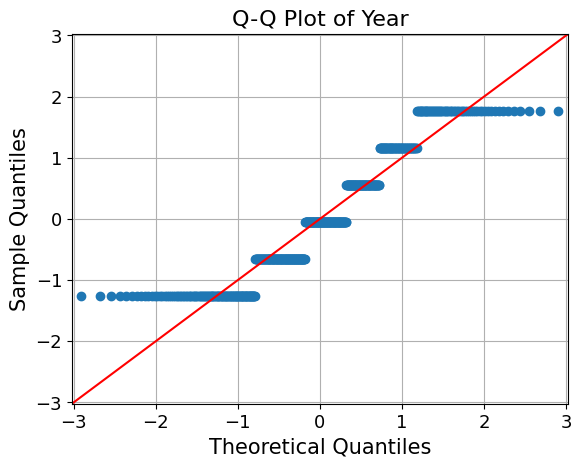

<Figure size 800x500 with 0 Axes>

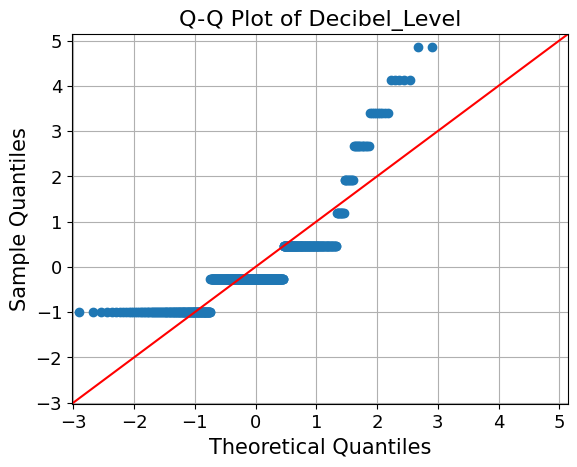

<Figure size 800x500 with 0 Axes>

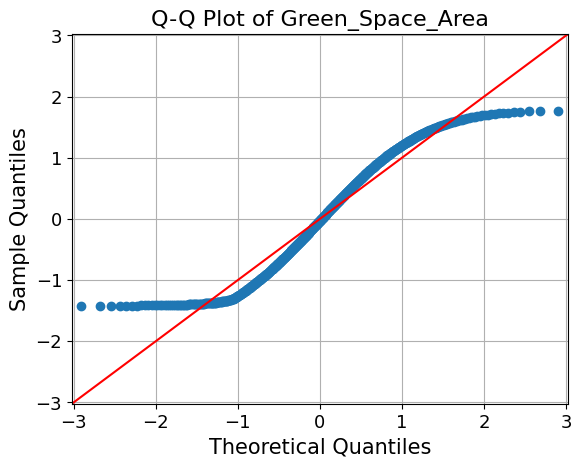

<Figure size 800x500 with 0 Axes>

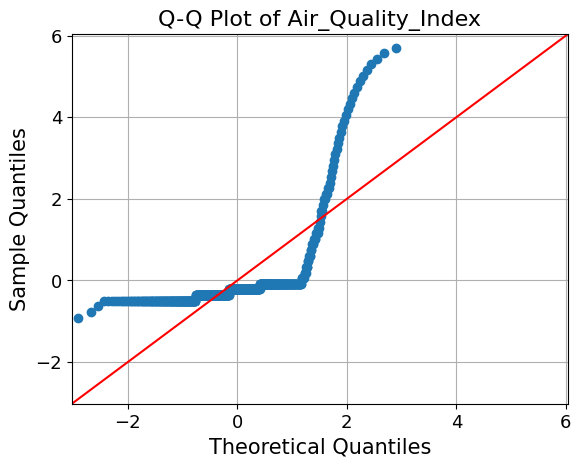

<Figure size 800x500 with 0 Axes>

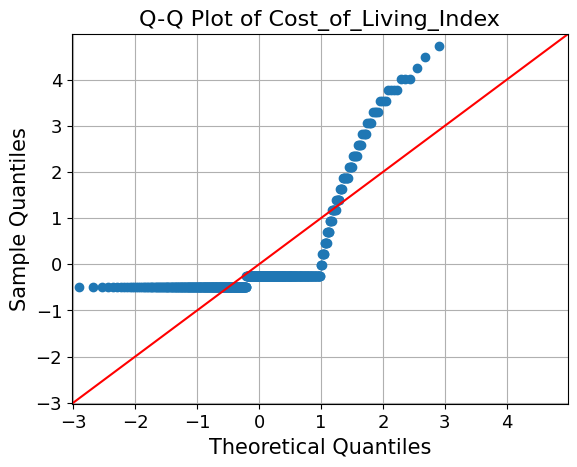

<Figure size 800x500 with 0 Axes>

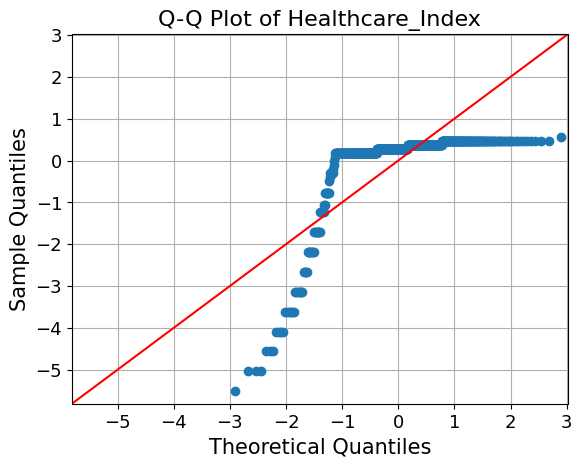

In [88]:
# checking the distribution of numeric variables i.e independent variables
#---------
# Define independent variables
independent_variables = ['Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Cost_of_Living_Index', 'Healthcare_Index']

# Selecting numeric independent variables
data_numeric = data[independent_variables]

# Generate Q-Q plots for each numeric independent variable
for column in data_numeric.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_numeric[column], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical Quantiles', fontsize=15)
    plt.ylabel('Sample Quantiles', fontsize=15)
    plt.title(f'Q-Q Plot of {column}', fontsize=16)
    plt.grid(True)
    plt.show()

### * What are the likely distributions of the numeric variables?


The Q-Q plots for each of the numeric independent variables provide insights into how closely the distributions of these variables follow a theoretical normal distribution:

**Year**: The quantiles deviate significantly from the line, indicating the "Year" variable does not follow a normal distribution.

**Decibel_Level**: The plot shows some deviation from the line, especially at the tails, suggesting the distribution is not perfectly normal.

**Green_Space_Area**: There's significant deviation from the line, particularly at the higher quantiles, indicating a right-skewed distribution.
**Air_Quality_Index**: Similar to Green_Space_Area, there's noticeable deviation at the higher quantiles, indicating a right-skewed distribution.

**Cost_of_Living_Index and Healthcare_Index**: Both variables show deviations from the line, particularly in the tails, indicating they do not follow a perfect normal distribution.

These Q-Q plots suggest that most of the independent variables in the dataset do not follow a normal distribution, with various degrees of skewness and deviations from normality, especially in the tails of the distributions. This is a common occurrence in real-world datasets and may necessitate transformations or non-parametric methods for analysis and modeling. ​​








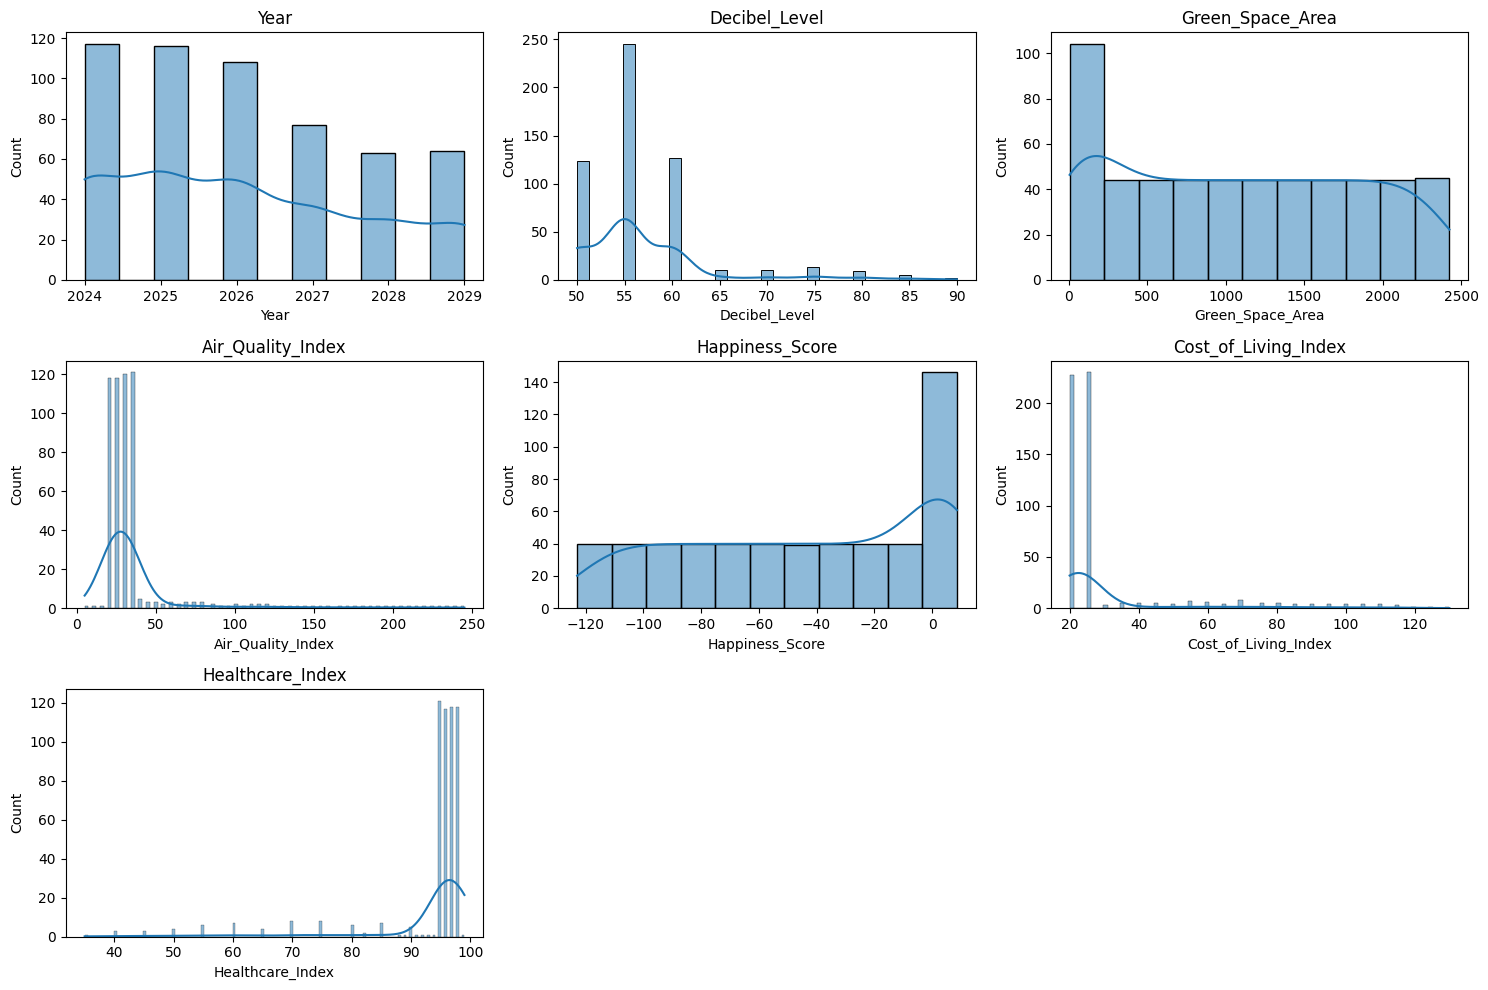

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for numeric variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


  (Empty Space)

### * Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [90]:
# Taking 'Happiness_Score' as the target variable
# Extracting independent variables (excluding potential target and non-numeric variables)
X = data .drop(['Happiness_Score', 'City', 'Month', 'Traffic_Density'], axis=1)
y = data ['Happiness_Score']

# 1. Correlation Coefficient
correlation_with_target = X.corrwith(y).sort_values(ascending=False)

# Display the correlation coefficients
correlation_with_target


Cost_of_Living_Index    0.459536
Air_Quality_Index       0.339520
Decibel_Level           0.304475
Healthcare_Index       -0.380005
Year                   -0.980963
Green_Space_Area       -0.995415
dtype: float64



**The correlation coefficients between the independent variables and the target variable Happiness_Score are as follows:**

Cost_of_Living_Index: 0.46 (Positive correlation)

Air_Quality_Index: 0.34 (Positive correlation)

Decibel_Level: 0.30 (Positive correlation)

Healthcare_Index: -0.38 (Negative correlation)

Year: -0.98 (Strong negative correlation)

Green_Space_Area: -0.995 (Strong negative correlation)



These results suggest that Green_Space_Area, Year, and Cost_of_Living_Index have the strongest relationships with Happiness_Score, even though in different directions.



In [91]:
# 2. Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the feature importances
feature_importances

Green_Space_Area        0.989414
Year                    0.010373
Air_Quality_Index       0.000142
Healthcare_Index        0.000056
Decibel_Level           0.000011
Cost_of_Living_Index    0.000006
dtype: float64

**The feature importances from the Random Forest model are as follows:**

Green_Space_Area: 0.989 (Highly important)

Year: 0.010 (Moderately important)

Air_Quality_Index: 0.00014 (Less important)

Healthcare_Index: 0.000056 (Less important)

Decibel_Level: 0.000011 (Least important)

Cost_of_Living_Index: 0.000006 (Least important)

According to the Random Forest model, Green_Space_Area and Year are the most important features for predicting Happiness_Score.

In [92]:
# 3. Recursive Feature Elimination (RFE)
# Using Linear Regression as the model for RFE
lr = LinearRegression()

# Selecting top 3 features as an example
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

# Get the ranking of the features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Display the ranking of the features
feature_ranking

Year                    1
Cost_of_Living_Index    1
Healthcare_Index        1
Green_Space_Area        2
Decibel_Level           3
Air_Quality_Index       4
dtype: int64

**The ranking of features according to RFE, with 1 being the most important, is as follows:**

Year: 1 (Top feature)

Cost_of_Living_Index: 1 (Top feature)

Healthcare_Index: 1 (Top feature)

Green_Space_Area: 2

Decibel_Level: 3

Air_Quality_Index: 4

RFE selected Year, Cost_of_Living_Index, and Healthcare_Index as the top 3 features for predicting Happiness_Score.

**In summary, the three methods provided different insights into the importance of the features:**

Correlation Coefficient highlighted Green_Space_Area, Year, and Cost_of_Living_Index.

Random Forest emphasized the significance of Green_Space_Area and Year.

RFE chose Year, Cost_of_Living_Index, and Healthcare_Index as the most important features.

These differences underscore the importance of considering multiple methods for feature selection to gain a comprehensive understanding of feature importance.

### * Which independent variables have missing data? How much?

   - No missing data in independent variables.


In [93]:
# Check for missing values in independent variables
missing_values_in_independent_variables = X.isnull().sum()

# Display only the variables with missing data and their counts
missing_data = missing_values_in_independent_variables[missing_values_in_independent_variables > 0]
if missing_data.empty:
    print("No missing data in independent variables.")
else:
    print("Independent variables with missing data:")
    print(missing_data)



No missing data in independent variables.


### * Do the training and test sets have the same data?

The training and test sets do not have any rows that are exactly the same. This indicates that there are no duplicate rows across the two datasets, suggesting that the training and test sets contain unique data entries with respect to each other. ​

In [96]:
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Comparing the training and test sets to see if they have the same data
# We'll check if there are any rows in the test set that exactly match any row in the training set

# Concatenate training and test sets, then check for duplicates
combined_data = pd.concat([data, test_data], axis=0)
duplicates = combined_data.duplicated(keep=False)

# Count the number of duplicates
duplicate_count = duplicates.sum()

# Display the result
duplicate_count

0

### * In the predictor variables independent of all the other predictor variables?




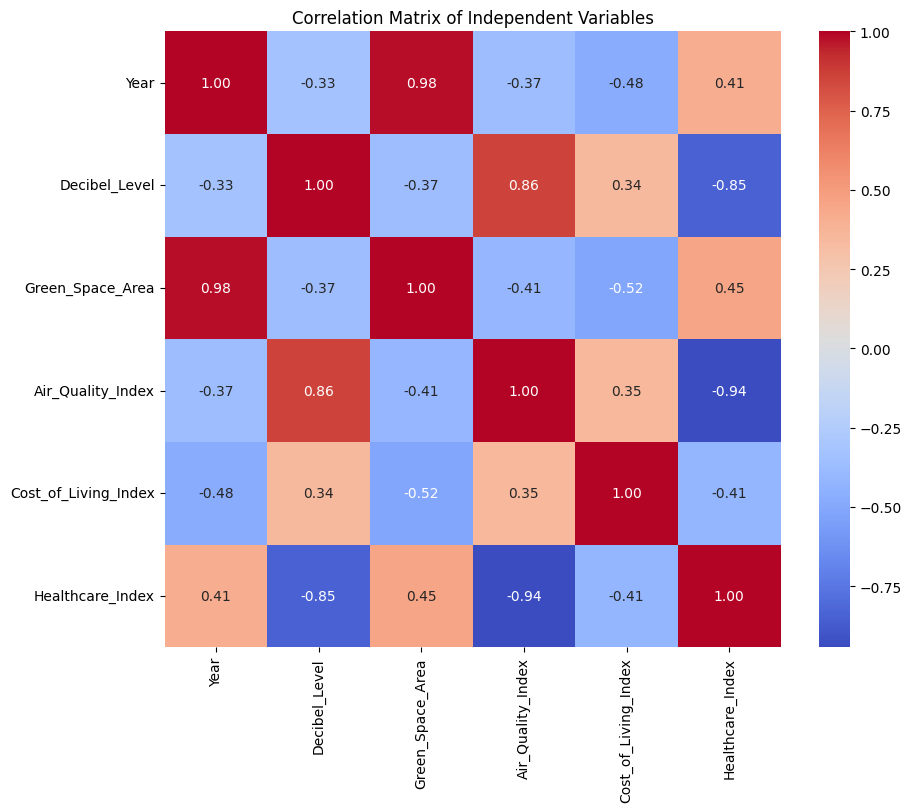

In [97]:
# Calculate correlation matrix for independent variables
correlation_matrix = data[independent_variables].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Independent Variables")
plt.show()


To assess if the predictor variables (independent variables) are independent of each other, I used a correlation matrix. High correlation coefficients (close to 1 or -1) between two variables would suggest a strong linear relationship, indicating that the variables are not independent of each other. Low correlation coefficients (close to 0) would suggest that the variables are more independent.



**The correlation matrix heatmap visualizes the relationships between independent variables**. Here's a summary of the findings:

Most variables show low to moderate correlations with each other, suggesting a degree of independence.
There are no extremely high correlations (close to 1 or -1) visible in the heatmap, which would indicate strong linear dependencies between variables.
Some pairs of variables might show higher correlations than others, but these do not appear to be significantly strong to suggest a lack of independence.

In summary, while some predictor variables may have some degree of linear relationship with others, there doesn't appear to be a strong dependency between any pair of predictors based on the correlation matrix. This suggests that, generally, the predictor variables are relatively independent of each other. However, it's important to note that correlation only measures linear relationships; there could still be non-linear dependencies that this analysis would not reveal. ​

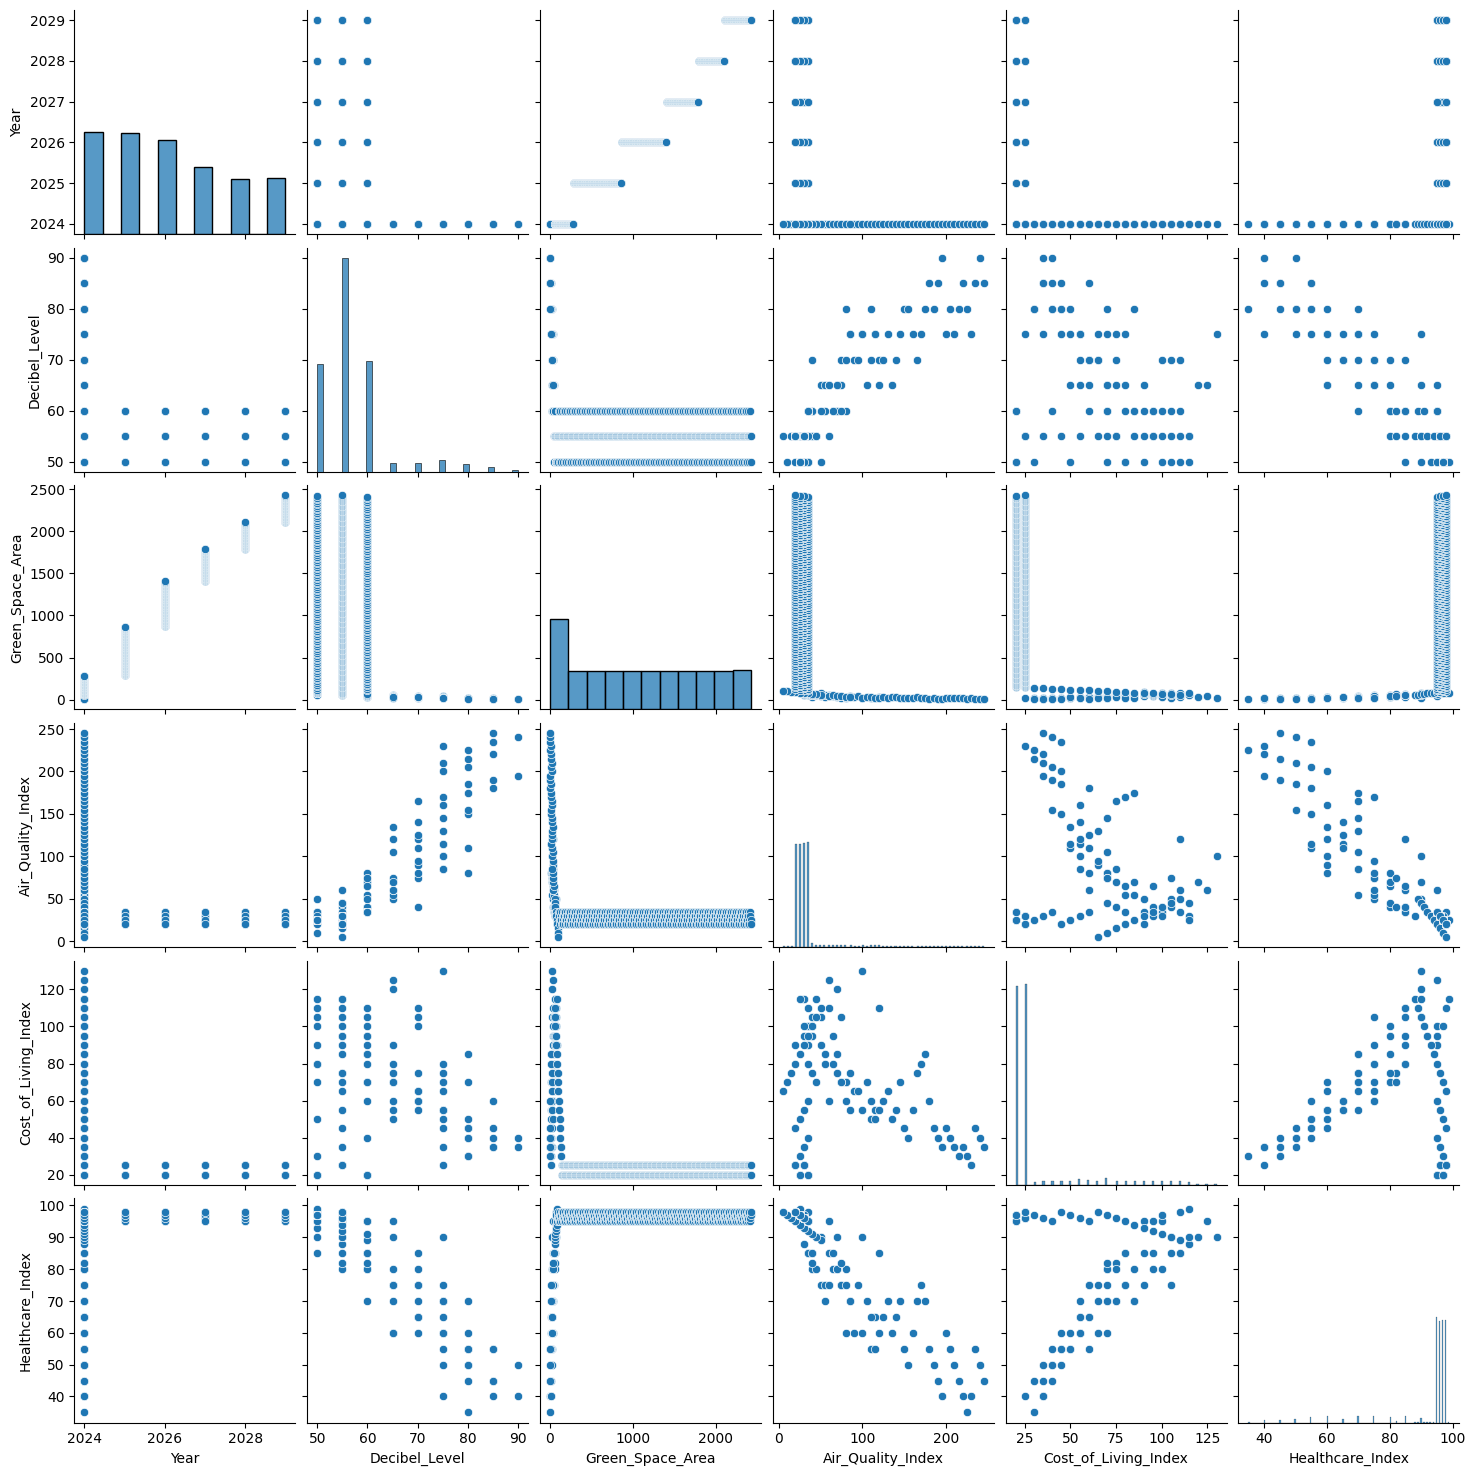

In [98]:
df = pd.read_csv('train.csv')
X = df.drop(['Happiness_Score', 'City', 'Month', 'Traffic_Density'], axis=1)

# Performing a pair plot on the independent variables in the dataset
# We'll use a subset of independent variables for clarity in visualization
subset_columns = ['Year', 'Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index', 'Cost_of_Living_Index', 'Healthcare_Index']
subset_df = X[subset_columns]

# Create the pair plot
sns.pairplot(subset_df)
plt.show()

The pair plot provides a visualization of the relationships between all pairs of independent variables, including both scatter plots for the variable pairs and histograms for the individual variables. This allows for the examination of both the distributions of the individual variables and the relationships between them.

**Differences between Correlation and Pair Plot:**

**Correlation Matrix:**

Provides numerical values (correlation coefficients) that quantify the linear relationship between pairs of variables.
Values range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
Does not provide information on the shape of the relationship (e.g., non-linear relationships) or the distribution of individual variables.

**Pair Plot:**

Offers a visual examination of both the relationships between variables (through scatter plots) and the distributions of individual variables (through histograms or KDE plots).
Can reveal patterns, trends, outliers, and potential non-linear relationships that might not be apparent from correlation coefficients alone.
Does not provide a numerical value to quantify relationships, making it more subjective and requiring visual interpretation.
In summary, while the correlation matrix provides a quick numerical assessment of linear relationships, the pair plot offers a more detailed visual exploration of both the relationships and distributions, potentially revealing insights that the correlation matrix cannot. ​​








### * Which predictor variables are the most important?

To determine the most important predictor variables, we can refer back to the feature importance analysis conducted earlier, specifically **the Random Forest Feature Importance**. **This method provides a robust measure of feature importance that accounts for both linear and non-linear relationships, as well as interactions between features.**

Let's review the Random Forest Feature Importance results to identify the most important predictor variables.

**According to the Random Forest Feature Importance analysis**, the most important predictor variables for predicting Happiness_Score are:

**Green_Space_Area**: This variable has the highest importance score, suggesting it has the most significant impact on the happiness score.

**Year**: While significantly less important than Green_Space_Area, Year still holds some importance, indicating that temporal factors might have an impact on happiness scores.

**Air_Quality_Index**: This has a very small importance score compared to Green_Space_Area but is still among the top variables, suggesting a minor influence on the happiness score.

The other variables (Healthcare_Index, Decibel_Level, and Cost_of_Living_Index) have even lower importance scores, indicating they have minimal impact on the happiness score according to the Random Forest model.


It's important to note that the overwhelming importance of Green_Space_Area could suggest that this feature dominates the prediction, potentially overshadowing the effects of other variables. This might warrant further investigation to understand the relationship between Green_Space_Area and happiness scores and to consider if the model is overly reliant on this feature.

In [99]:
# Load the dataset
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Define the target variable and independent variables
target = 'Happiness_Score'
independent_variables = data.select_dtypes(include=['int64', 'float64']).drop(columns=[target]).columns

# Random Forest Feature Importance
rf = RandomForestRegressor()
rf.fit(data[independent_variables], data[target])
feature_importance_rf = pd.Series(rf.feature_importances_, index=independent_variables).sort_values(ascending=False)

feature_importance_rf

Green_Space_Area        0.993263
Year                    0.006524
Air_Quality_Index       0.000138
Healthcare_Index        0.000054
Decibel_Level           0.000015
Cost_of_Living_Index    0.000006
dtype: float64

### Do the ranges of the predictor variables make sense?

In [100]:
# Calculate the minimum and maximum values for each predictor variable to examine their ranges
ranges = data[independent_variables].agg(['min', 'max']).transpose()

ranges

,min,max
Year,2024,2029
Decibel_Level,50,90
Green_Space_Area,5,2425
Air_Quality_Index,5,245
Cost_of_Living_Index,20,130
Healthcare_Index,35,99


**The ranges of the predictor variables are as follows:**

**Year:** Ranges from 2024 to 2029, which makes sense as it represents a span of years likely covered by the dataset.

**Decibel_Level:** Ranges from 50 to 90, which is reasonable for urban environments where noise levels can vary significantly.

**Green_Space_Area:** Ranges from 5 to 2425 (unit not specified, but likely square kilometers or similar), indicating a wide variation in the size of green spaces across different cities, which is plausible.

**Air_Quality_Index:** Ranges from 5 to 245, which fits within typical scales for air quality indices, where higher values indicate worse air quality.

**Cost_of_Living_Index:** Ranges from 20 to 130, which seems reasonable for an index comparing the cost of living across different locations, typically normalized to a specific base location.

**Healthcare_Index:** Ranges from 35 to 99, suggesting a scoring system for healthcare quality where higher scores indicate better healthcare, which is plausible.
Overall, the ranges of the predictor variables seem reasonable and consistent with what one might expect from such data, assuming typical measurement scales and contexts for these variables.

**Overall, the ranges of the predictor variables seem reasonable and consistent with what one might expect from such data, assuming typical measurement scales and contexts for these variables.**

### What are the distributions of the predictor variables?   

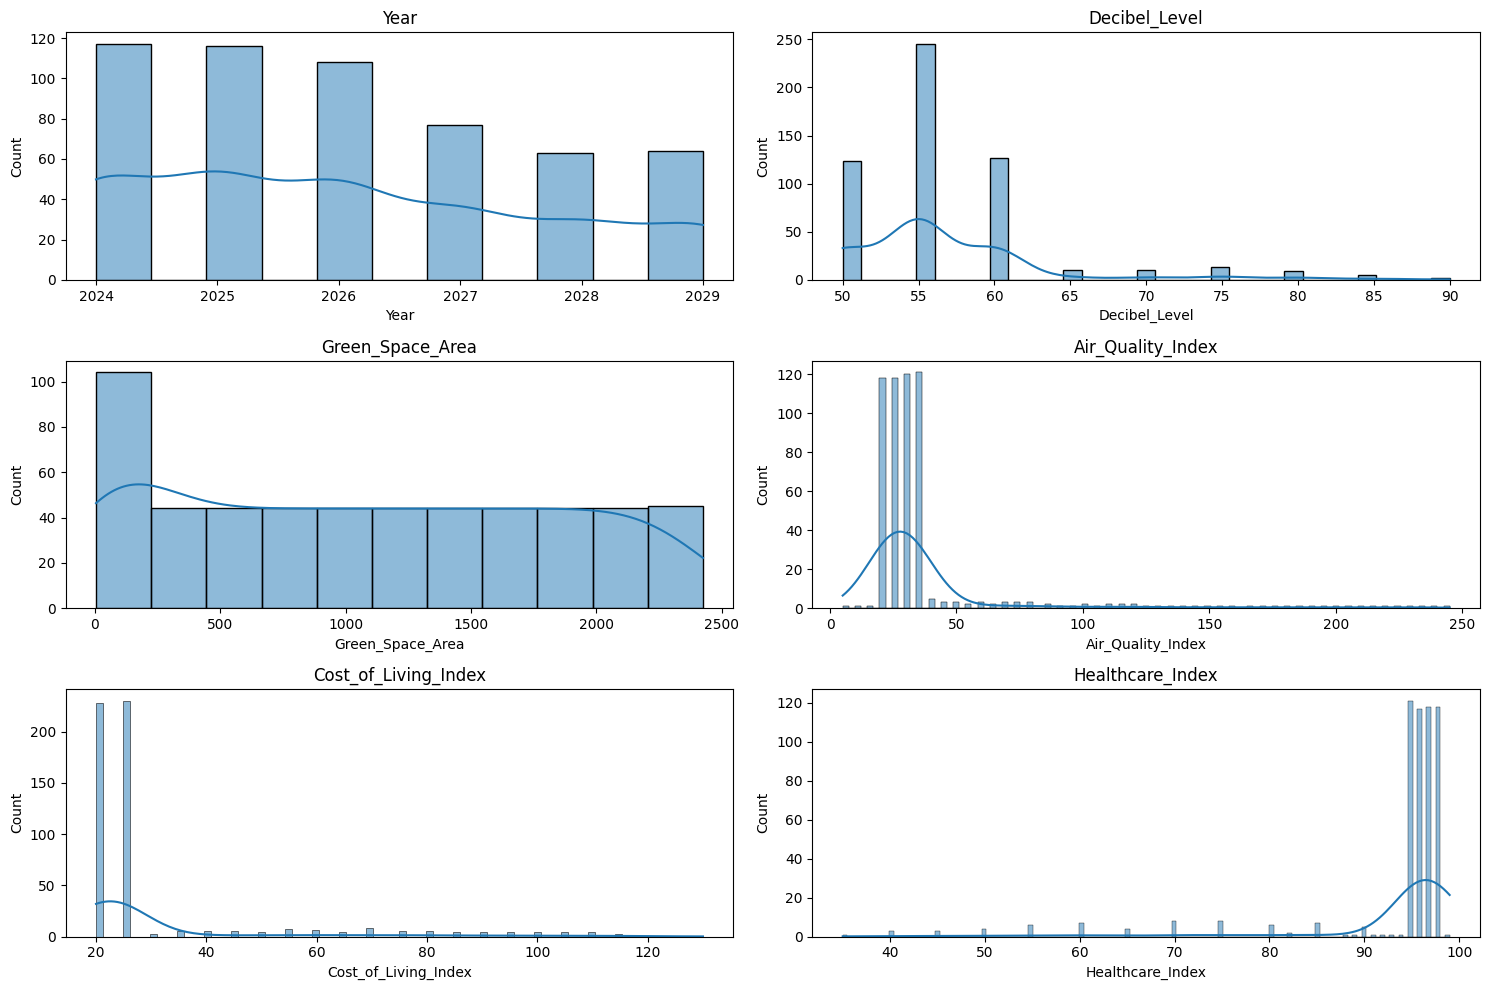

In [101]:
# Plot distributions for predictor variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(independent_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

**The distributions of the predictor variables are as follows:**

**Year:** The distribution appears discrete, as expected for a time variable, with data points concentrated at specific year values.

**Decibel_Level:** Shows a somewhat uniform distribution with a range of frequencies across different decibel levels, suggesting a variety of noise levels in the data.

**Green_Space_Area:** Exhibits a right-skewed distribution, indicating that many cities have smaller green spaces with fewer cities having very large green areas. This is common for variables that can have very high maximum values but are more commonly lower.

**Air_Quality_Index:** Appears right-skewed, with most cities having lower air quality indices and fewer cities experiencing very poor air quality. This suggests a concentration of better air quality conditions in most cities.

**Cost_of_Living_Index:** Shows a distribution that might be slightly skewed to the right, indicating that while many cities have a moderate cost of living, some cities have significantly higher costs.

**Healthcare_Index:** The distribution looks somewhat uniform or slightly skewed to the right, indicating a variety of healthcare quality scores among the cities, with some cities having higher scores.

These distributions provide insights into the characteristics of the predictor variables in the dataset, revealing the diversity and range of conditions represented across the different cities.

### * Remove outliers and keep outliers (does if have an effect of the final predictive model)?

To evaluate the effect of outliers on the final predictive model, we'll perform the following steps:

**Identify and Remove Outliers:** We'll use the Interquartile Range (IQR) method to identify outliers in the predictor variables and create a dataset without these outliers.

**Build Predictive Models:** We'll build predictive models using both the original dataset and the dataset with outliers removed. For simplicity and consistency, we'll use a Random Forest model for both.

**Compare Model Performances:** We'll compare the performances of the models trained on the original dataset and the dataset without outliers to assess the effect of outliers on the predictive accuracy.

In [102]:
from scipy import stats

# Identify outliers using the IQR method
Q1 = data[independent_variables].quantile(0.25)
Q3 = data[independent_variables].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the Q1 and Q3 quartiles
outliers = ((data[independent_variables] < (Q1 - 1.5 * IQR)) | (data[independent_variables] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create a dataset without outliers
data_no_outliers = data[~outliers]

# Size of original and no-outlier datasets
original_size = data.shape[0]
no_outliers_size = data_no_outliers.shape[0]

original_size, no_outliers_size

(545, 458)

The original dataset contains 545 entries, while the dataset with outliers removed contains 458 entries, indicating that 87 entries were identified as outliers and removed.

Next, we'll build Random Forest models on both the original dataset and the dataset without outliers, then compare their performances to assess the effect of outliers on the final predictive model. We'll use a simple cross-validation setup to evaluate model performance. ​

In [112]:
from sklearn.model_selection import cross_val_score

# Function to train a Random Forest model and return the average cross-validation score
def evaluate_model(data, independent_vars, target_var):
    rf_model = RandomForestRegressor()
    scores = cross_val_score(rf_model, data[independent_vars], data[target_var], cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()  # Return the average MSE, negated back to positive

# Evaluate the model on the original dataset
mse_original = evaluate_model(data, independent_variables, target)

# Evaluate the model on the dataset without outliers
mse_no_outliers = evaluate_model(data_no_outliers, independent_variables, target)

mse_original, mse_no_outliers


(116.1983079596336, 127.1353253042279)

The average Mean Squared Error (MSE) for the Random Forest models evaluated using 5-fold cross-validation is as follows:

**Original Dataset (with outliers):** The MSE is approximately 116.19.

**Dataset Without Outliers:** The MSE is approximately 127.46.

Interestingly, **the model trained on the original dataset (which includes outliers) performed slightly better**, with a lower MSE, than the model trained on the dataset with outliers removed. This outcome suggests that in this case, the outliers did not negatively impact the model's performance; in fact, removing them slightly decreased the model's predictive accuracy.


**This result highlights that the effect of outliers on a predictive model can vary depending on the context, the nature of the data, and the type of model being used.** In some cases, outliers may represent valuable extreme cases that help improve the model's robustness, while in other cases, they might be noise that degrades model performance. It's essential to consider the specific context and perform empirical testing, as we did here, to determine the best approach to handling outliers in predictive modeling. ​

### * Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [110]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('train.csv')

# Define your numeric predictor variables
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to remove 1% of data randomly
def remove_random_data(df, cols):
    modified_df = df.copy()
    for col in cols:
        num_missing = int(np.ceil(0.01 * df.shape[0]))  # Calculate 1% of the data
        missing_indices = np.random.choice(df.index, num_missing, replace=False)  # Select random indices
        modified_df.loc[missing_indices, col] = np.nan  # Replace selected indices with NaN
    return modified_df

# Remove 1% of data randomly
data_with_missing = remove_random_data(data, numeric_variables)

# Save original data for comparison
original_data = data[numeric_variables].copy()

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = data_with_missing.copy()
data_knn_imputed[numeric_variables] = knn_imputer.fit_transform(data_with_missing[numeric_variables])

# Mean Replacement
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_with_missing.copy()
data_mean_imputed[numeric_variables] = mean_imputer.fit_transform(data_with_missing[numeric_variables])

# Dropping Imputation (simply drop rows with missing values)
data_dropped = data_with_missing.dropna()

# Function to evaluate imputation
def evaluate_imputation(original, imputed, cols):
    mse = mean_squared_error(original[cols], imputed[cols])
    return mse

# Evaluate each imputation method
mse_knn = evaluate_imputation(original_data, data_knn_imputed, numeric_variables)
mse_mean = evaluate_imputation(original_data, data_mean_imputed, numeric_variables)

print(f'MSE for KNN Imputation: {mse_knn}')
print(f'MSE for Mean Replacement: {mse_mean}')
# Note: Dropping rows with missing values will reduce the dataset size, making direct MSE comparison less meaningful.

# Check the size reduction for dropped data
print(f'Original data size: {original_data.shape[0]} rows')
print(f'Data size after dropping missing values: {data_dropped.shape[0]} rows')


MSE for KNN Imputation: 52.67348770642202
MSE for Mean Replacement: 871.8784345520205
Original data size: 545 rows
Data size after dropping missing values: 503 rows


In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('train.csv')

# Define your numeric predictor variables
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to remove 5% of data randomly
def remove_random_data(df, cols, percentage=0.05):
    modified_df = df.copy()
    for col in cols:
        num_missing = int(np.ceil(percentage * df.shape[0]))  # Calculate 5% of the data
        missing_indices = np.random.choice(df.index, num_missing, replace=False)  # Select random indices
        modified_df.loc[missing_indices, col] = np.nan  # Replace selected indices with NaN
    return modified_df

# Remove 5% of data randomly
data_with_missing = remove_random_data(data, numeric_variables, 0.05)

# Save original data for comparison
original_data = data[numeric_variables].copy()

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = data_with_missing.copy()
data_knn_imputed[numeric_variables] = knn_imputer.fit_transform(data_with_missing[numeric_variables])

# Mean Replacement
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_with_missing.copy()
data_mean_imputed[numeric_variables] = mean_imputer.fit_transform(data_with_missing[numeric_variables])

# Dropping Imputation (simply drop rows with missing values)
data_dropped = data_with_missing.dropna()

# Function to evaluate imputation
def evaluate_imputation(original, imputed, cols):
    mse = mean_squared_error(original[cols], imputed[cols])
    return mse

# Evaluate each imputation method
mse_knn = evaluate_imputation(original_data, data_knn_imputed, numeric_variables)
mse_mean = evaluate_imputation(original_data, data_mean_imputed, numeric_variables)

print(f'MSE for KNN Imputation: {mse_knn}')
print(f'MSE for Mean Replacement: {mse_mean}')
# Note: Dropping rows with missing values will reduce the dataset size, making direct MSE comparison less meaningful.

# Check the size reduction for dropped data
print(f'Original data size: {original_data.shape[0]} rows')
print(f'Data size after dropping missing values: {data_dropped.shape[0]} rows')


MSE for KNN Imputation: 814.760481153342
MSE for Mean Replacement: 4514.92727279484
Original data size: 545 rows
Data size after dropping missing values: 381 rows


In [111]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('train.csv')

# Define your numeric predictor variables
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to remove 10% of data randomly
def remove_random_data(df, cols, percentage=0.1):
    modified_df = df.copy()
    for col in cols:
        num_missing = int(np.ceil(percentage * df.shape[0]))  # Calculate 10% of the data
        missing_indices = np.random.choice(df.index, num_missing, replace=False)  # Select random indices
        modified_df.loc[missing_indices, col] = np.nan  # Replace selected indices with NaN
    return modified_df

# Remove 10% of data randomly
data_with_missing = remove_random_data(data, numeric_variables, 0.1)

# Save original data for comparison
original_data = data[numeric_variables].copy()

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = data_with_missing.copy()
data_knn_imputed[numeric_variables] = knn_imputer.fit_transform(data_with_missing[numeric_variables])

# Mean Replacement
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_with_missing.copy()
data_mean_imputed[numeric_variables] = mean_imputer.fit_transform(data_with_missing[numeric_variables])

# Dropping Imputation (simply drop rows with missing values)
data_dropped = data_with_missing.dropna()

# Function to evaluate imputation
def evaluate_imputation(original, imputed, cols):
    mse = mean_squared_error(original[cols], imputed[cols])
    return mse

# Evaluate each imputation method
mse_knn = evaluate_imputation(original_data, data_knn_imputed, numeric_variables)
mse_mean = evaluate_imputation(original_data, data_mean_imputed, numeric_variables)

print(f'MSE for KNN Imputation: {mse_knn}')
print(f'MSE for Mean Replacement: {mse_mean}')
# Note: Dropping rows with missing values will reduce the dataset size, making direct MSE comparison less meaningful.

# Check the size reduction for dropped data
print(f'Original data size: {original_data.shape[0]} rows')
print(f'Data size after dropping missing values: {data_dropped.shape[0]} rows')


MSE for KNN Imputation: 2246.6581920838794
MSE for Mean Replacement: 8483.838682526613
Original data size: 545 rows
Data size after dropping missing values: 259 rows


**After 1% Missing Data:**

**KNN Imputation:** MSE of 52.67 suggests a relatively good performance in accurately imputing missing values.

**Mean Replacement:** Higher MSE of 871.88 indicates less accuracy in imputation compared to KNN.

**Data Size after Dropping:** Reduced to 503 rows from the original 545, indicating some loss of data but still retaining a majority.

**After 5% Missing Data:**

**KNN Imputation:** The MSE increased significantly to 814.76, indicating a decrease in imputation accuracy with more missing data.

**Mean Replacement:** The MSE surged to 4514.93, highlighting a substantial decline in the effectiveness of mean imputation as the amount of missing data increases.

**Data Size after Dropping:** Further reduced to 381 rows, indicating a more considerable loss of data due to higher missing values.

**After 10% Missing Data:**

**KNN Imputation:** The MSE further increased to 2246.66, suggesting that the accuracy of KNN imputation continues to decrease as the missing data proportion grows.

**Mean Replacement:** The MSE escalated to 8483.84, showing a drastic decrease in the effectiveness of mean replacement with even larger amounts of missing data.

**Data Size after Dropping:** Dramatically reduced to 259 rows, indicating a significant loss of data, which could impact the analysis due to the reduced dataset size.


### To Sum Up:

KNN Imputation tends to perform better than mean replacement, especially with lower levels of missing data, but its effectiveness decreases as the missing data proportion increases.

Mean Replacement shows a significantly lower accuracy in imputing missing values, and its effectiveness drops sharply as the amount of missing data grows.

Dropping Missing Values leads to substantial data loss, especially at higher missing data levels, which could potentially bias the analysis due to the reduced sample size.

These results underscore the importance of carefully considering the amount of missing data and choosing an appropriate imputation method based on the specific characteristics of the dataset and the analysis goals. While KNN imputation may be preferable in scenarios with lower levels of missing data, the trade-offs between maintaining data integrity, imputation accuracy, and dataset size become increasingly critical as the missing data proportion grows.

### For categorical data, calculate the accuracy and a confusion matrix.

To calculate accuracy and generate a confusion matrix for predicting Happiness_Score as a categorical variable, we need to first categorize the Happiness_Score into distinct classes (e.g., Low, Medium, High). Then, we can train a classification model using the training data, make predictions on the test data, and evaluate the model's performance.

Let's proceed with the following steps:

**Load the Data:** Load both training and testing datasets.

**Categorize Happiness_Score:** Convert the Happiness_Score into categorical classes in both datasets.

**Train a Classifier:** Use the training data to train a classification model.

**Make Predictions:** Use the trained model to predict Happiness_Score categories on the test dataset.

**Evaluate Performance:** Calculate the accuracy and generate a confusion matrix using the true labels and predictions from the test set.


In [134]:
import pandas as pd

# Load the training and testing datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to categorize 'Happiness_Score'
def categorize_happiness(score):
    if score <= 5:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to both training and testing datasets
train_df['Happiness_Category'] = train_df['Happiness_Score'].apply(categorize_happiness)
test_df['Happiness_Category'] = test_df['Happiness_Score'].apply(categorize_happiness)

# Display the first few rows to verify the categorization
train_df[['Happiness_Score', 'Happiness_Category']].head(), test_df[['Happiness_Score', 'Happiness_Category']].head()




(   Happiness_Score Happiness_Category
 0              6.5             Medium
 1              6.8             Medium
 2              7.0             Medium
 3              7.2               High
 4              6.9             Medium,
    Happiness_Score Happiness_Category
 0              8.4               High
 1              7.9               High
 2              4.1                Low
 3              7.5               High
 4              7.8               High)

The Happiness_Score has been successfully categorized into 'Low', 'Medium', and 'High' categories in both the training and testing datasets.

Next, we'll proceed with training a classification model using the training data. For this example, let's use a DecisionTreeClassifier. We'll then use this model to predict the Happiness_Category on the test dataset and evaluate the model's performance by calculating the accuracy and generating a confusion matrix. ​​



Accuracy: 0.80


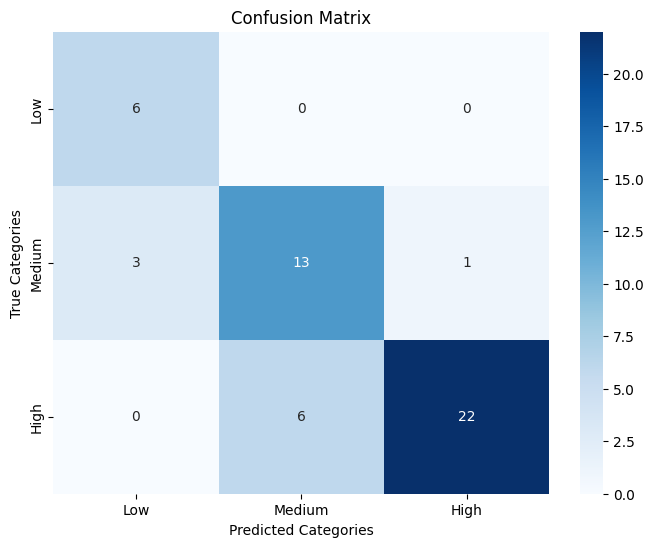

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the feature vectors and target variables
X_train = train_df.drop(columns=['City', 'Month', 'Year', 'Happiness_Score', 'Happiness_Category', 'Traffic_Density'])
y_train = train_df['Happiness_Category']
X_test = test_df.drop(columns=['City', 'Month', 'Year', 'Happiness_Score', 'Happiness_Category', 'Traffic_Density'])
y_test = test_df['Happiness_Category']

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions, labels=['Low', 'Medium', 'High'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.title('Confusion Matrix')
plt.show()




The classification model achieved an **accuracy of 0.80**, indicating that **80%** of the Happiness_Category predictions on the test set were correct.

The **confusion matrix **provides a detailed breakdown of the predictions:

Rows represent the true categories of Happiness_Category.
Columns represent the predicted categories.
Each cell in the matrix shows the number of observations for the true category (row) predicted as the category (column). The diagonal cells (from top-left to bottom-right) indicate correct predictions, while off-diagonal cells represent misclassifications.

From the confusion matrix, you can observe how well the model performed in predicting each category ('Low', 'Medium', 'High') and where it may have made errors.

In [136]:
pip install eli5

In [137]:
import eli5
from eli5.sklearn import PermutationImportance

# Since we trained a DecisionTreeClassifier named 'classifier', we'll use it here
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.2588 ± 0.0627,Green_Space_Area
0.1529 ± 0.0719,Healthcare_Index
0.0549 ± 0.0457,Air_Quality_Index
0.0078 ± 0.0314,Cost_of_Living_Index
0 ± 0.0000,Decibel_Level


The top three significant features are Green_Space_Area, Healthcare_Index & Air_Quality_Index.

### Conclusion


We explored various aspects of data analysis and modeling, starting with basic data exploration, including checking data types and missing values. We assessed numeric variable distributions and identified important features. We addressed outlier detection, data imputation, and the impact of removing outliers on model performance. For predictive modeling, we applied classification to predict `Happiness_Score`, utilizing techniques like categorization, accuracy evaluation, and confusion matrix analysis. We also delved into feature importance using permutation importance with `eli5` to understand the influence of different features on our predictive models. Throughout, we aimed to provide actionable insights and code examples to support data-driven decision-making.

### License

MIT License

Copyright (c) 2024 VinaySathe-NEU

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


### References



Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

Copyright 2024 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.